# Linee Segnalatrici di Probabilità Pluviometrica (LSPP)

Matteo Franzoi - Andrea Rebellato - 2019-03-27

---

In [1]:
import os
from pandas import *
import pandas as pd
from numpy import *
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import math
from datetime import datetime
from scipy.stats import genextreme, gumbel_r
from numpy import linspace
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
pd.set_option('display.max_rows', 10)
data = read_csv('massimePrecipitazioniCenta.csv')
map(datetime, data['anno'])
data = data.set_index('anno')
data

,15min,30min,45min,1h,3h,6h,12h,24h
anno,,,,,,,,
1934,NaN,NaN,NaN,22.6,42.0,56.6,58.8,85.0
1935,NaN,NaN,NaN,17.8,32.6,54.2,63.6,88.0
1936,NaN,NaN,NaN,15.8,28.0,41.4,72.0,85.2
1937,NaN,NaN,NaN,27.8,35.6,38.2,58.4,62.6
1938,NaN,NaN,NaN,15.0,21.4,32.0,56.0,83.0
...,...,...,...,...,...,...,...,...
2000,23.2,33.0,34.8,36.4,42.2,52.8,90.0,120.4
2003,16.2,27.0,34.8,37.4,38.8,62.8,101.0,121.6
2004,25.8,37.4,40.2,42.2,43.0,45.2,57.6,80.4


In [3]:
os.getcwd()

'/media/data/jupyter/esercitazione'

In [4]:
os.listdir()

['.ipynb_checkpoints',
 '.~lock.massimePrecipitazioniCenta_02.csv#',
 'abs_ls',
 'abs_m',
 'abs_mle',
 'best_parameters',
 'lsCenta.ipynb',
 'lsppCenta.ipynb',
 'massimePrecipitazioniCenta.csv',
 'mleCenta.ipynb',
 'momentiCenta.ipynb',
 'pearsonCenta.ipynb']

['.ipynb_checkpoints',  
 'abs_ls',  
 'abs_m',  
 'abs_mle',  
 '**best_parameters**',  
 'lsCenta.ipynb',  
 'lsppCenta.ipynb',  
 'massimePrecipitazioniCenta.csv',  
 'mleCenta.ipynb',  
 'momentiCenta.ipynb',  
 'pearsonCenta.ipynb']

In [5]:
best = read_pickle('best_parameters')
best

,15min,30min,45min,1h,3h,6h,12h,24h
a,11.551692,15.102191,17.638540,20.077738,30.042461,41.084931,57.402093,76.440792
b,4.051040,5.406040,6.168513,6.560461,9.253392,12.291069,19.296026,24.643281


Con un tempo di ritorno di $10$ anni ci si aspetta un quantile del valore di $0.9$, poiché
$$
\large qu = 1- \dfrac{1}{T_r}
$$

Si definisce la funzione `qtls` che calcola l'inversa della distribuzione di Gumbel in funzione al quantile scelto

In [6]:
def qtls(df, h, qu):
    rv = gumbel_r(loc = df[h]['a'], scale = df[h]['b'])
    return rv.ppf(qu)

Si ha che per ogni valore di durata

In [7]:
for h in data.columns:
    print(h, ':',qtls(best, h, .9))

15min : 20.668020123737527
30min : 27.267767682571872
45min : 31.519960375396494
1h : 34.841183758836614
3h : 50.86599125578606
6h : 68.74435174751686
12h : 100.82523897962746
24h : 131.89722554326937


e salvandoli in un DataFrame, per 3 diversi tempi di ritorno: 10, 20 e 100 anni.

In [8]:
Tr=10
q10=1-1/Tr
q20=1-1/20
q100=1-1/100

a = []
for h in data.columns:
    a = a + [[qtls(best, h, q10), qtls(best, h, q20), qtls(best, h, q100)]]
    
pts = pd.DataFrame(a, index = ['15min', '30min', '45min','1h', '3h', '6h', '12h', '24h'], columns = ['10y', '20y', '100y'])
pts

,10y,20y,100y
15min,20.668020,23.584072,30.187081
30min,27.267768,31.159187,39.970784
45min,31.519960,35.960229,46.014621
1h,34.841184,39.563586,50.256835
3h,50.865991,57.526841,72.609443
6h,68.744352,77.591807,97.625684
12h,100.825239,114.715057,146.166691
24h,131.897226,149.636147,189.803561


## PLOT

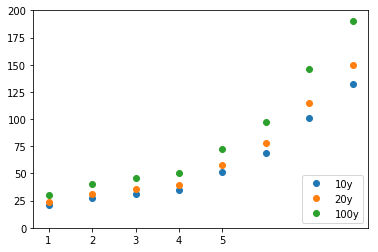

In [9]:
ag = pts.plot(style = 'o')
ag.legend(loc = 4)
plt.ylim([0,200])
ag.set_xticks([0,1,2,3,4])
ag.set_xticklabels(i+1 for i in range(0,5))
plt.show()

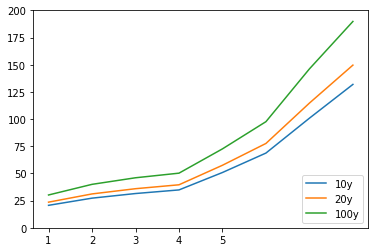

In [10]:
ag = pts.plot(style = '-')
ag.legend(loc = 4)
plt.ylim([0,200])
ag.set_xticks([0,1,2,3,4])
ag.set_xticklabels(i+1 for i in range(0,5))
plt.show()

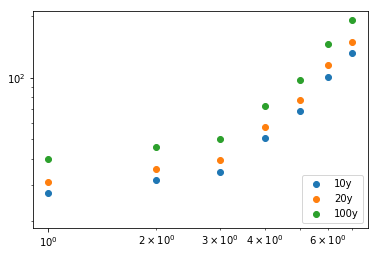

In [12]:
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
#--------------------------------------
ag = pts.plot(style = 'o')
#-------------------------------------
ag.legend(loc = 4)
#plt.ylim([40, 200])
#plt.xlim([.9, 5])
#--------------------------------------
ag.set_yscale('log')
ag.set_xscale('log')
#--------------------------------------
plt.show()

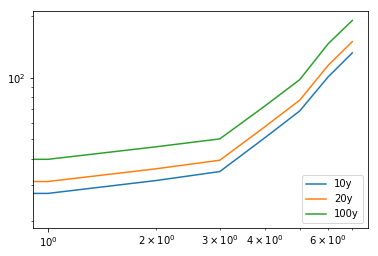

In [14]:
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)
#--------------------------------------
ag = pts.plot(style = '-')
#-------------------------------------
ag.legend(loc = 4)
#plt.ylim([40, 200])
#plt.xlim([1, 5])
#--------------------------------------
ag.set_yscale('log')
ag.set_xscale('log')
#--------------------------------------
plt.show()